In [1]:
from numpy import *
import scipy
import pylab
import matplotlib.pyplot as plt # plotting libraries from matlab
from scipy.stats import multivariate_normal
from dateutil import parser
import matplotlib.dates as md
import scipy.io as sio
from scipy.optimize import curve_fit # for fitting
import pandas as pd

In [10]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource, output_server, cursession, curdoc, output_notebook
from bokeh.models.widgets import Slider, TextInput, HBox, VBox, Dialog, Button, VBoxForm, MultiSelect, PreText, Select
from bokeh.models import Range1d, HoverTool, BoxSelectTool
from bokeh.server.utils.plugins import object_page
from IPython.html.widgets import interact

/Users/attiladobi/anaconda/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
/Users/attiladobi/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [4]:
data=sio.loadmat('/Users/attiladobi/LUXCode/Scratch/AttilaDobi/data/Platinum/Platinum_CH3T_Aug.mat')

In [5]:
#define function to convert matfile into dataframe (panda)
def df_from_mat(mat_data):
    a=[]
    keys=[]
    
    for key in mat_data.keys():
        if key[0]!='_':
            a.append(mat_data[key])
            keys.append(key)
    keys=array(keys)
    return pd.DataFrame(vstack(a[:]).T,columns=keys)

In [6]:
df=df_from_mat(data)

In [8]:
# convert luxstamp to date_num
lux_epoch=md.datestr2num('Jan 1st 2011 at 00:00')
luxstamp2day=df['luxstamp']/10**8/3600/24
luxdatenum=md.num2date(luxstamp2day+lux_epoch)
df['luxdatenum']=luxdatenum

g1=0.117
g2=12.05

df['log10S2spikyS1']=log10(df['s2area']/df['spikyS1'])
#df['rawlog10S2spikyS1']=log10(df['s2area_raw']/df['spikyS1_raw'])
df['log10S2S1']=log10(df['s2area']/df['s1area'])
df['log10S2S1_raw']=log10(df['s2area_raw']/df['s1area_raw'])
df['s2radius_corr']=sqrt(df['corrected_x']**2 + df['corrected_y']**2)
df['s2radius2_corr']=df['corrected_x']**2 + df['corrected_y']**2
df['energy']=1/73*(df['spikyS1']/g1 + df['s2area']/g2)
df['x']=df['s1area']
df['y']=df['log10S2S1']

In [11]:
ds=ColumnDataSource(df)

<h1> now plot x vs y and create a button to choose the x and y to plot </h1>


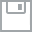
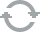
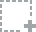
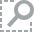
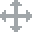
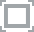
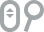
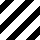
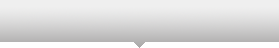
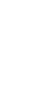
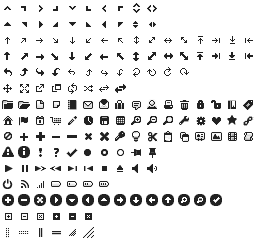
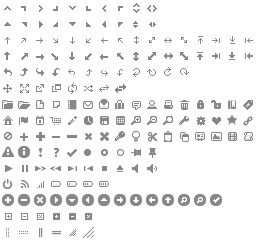
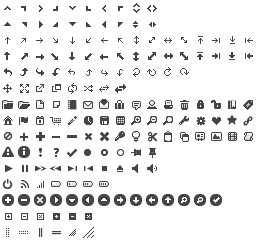
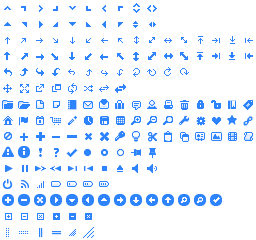
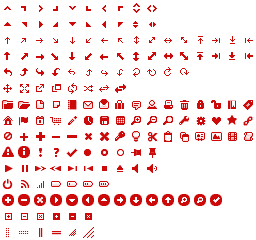
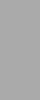
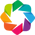
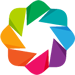

In [12]:
output_notebook()

In [16]:
tools="pan,wheel_zoom,box_zoom,box_select,reset,save,hover,click,lasso_select" #crosshair

#output_file("color_scatter.html", title="color_scatter.py example")
p1 = figure(title='',plot_width=500, plot_height=400, tools=tools,x_axis_label = "S1 (phd)",y_axis_label = "log10(S2/S1)")
p1.scatter('x', 'y', source=ds, size=2, color='blue',fill_alpha=.2,alpha=1,line_color="blue",line_width=1)

In [30]:
def update(x='s1area',y='log10S2S1'):
    ds.data['x']=df[x]
    ds.data['y']=df[y]
    ds.push_notebook()

In [32]:
df['s1area']

0        49.301651
1        12.357868
2        23.988888
3        22.459162
4         3.099517
5         3.691547
6        40.029823
7        55.771713
8        59.843388
9        51.212528
10      107.475800
11        6.856682
12       26.579613
13       50.974674
14       27.068764
15       31.798780
16       19.203405
17        6.109657
18       32.860168
19       46.293640
20       23.653149
21       50.588158
22       27.217844
23       27.219070
24        4.902040
25       21.565266
26       11.103615
27       66.577682
28       41.280025
29        7.763684
           ...    
3920     26.373178
3921     19.081514
3922     49.339470
3923     15.075313
3924     59.361397
3925     78.180054
3926     40.460201
3927     12.760497
3928     10.066525
3929     47.238758
3930     10.020123
3931     12.310540
3932      2.524497
3933     59.812210
3934     36.930367
3935    127.568733
3936     48.323853
3937     52.860584
3938     61.596031
3939     62.213223
3940     31.793455
3941      8.

In [18]:
show(p1)

In [ ]:
interact(update,x=["s1area","spikyS1","energy","s1area_raw","log10S2S1","log10S2spikyS1","log10S2S1_raw","s2radius_corr","s2radius2_corr","corrected_x","corrected_y","drift","luxdatenum"]
         ,y=["s1area","spikyS1","energy","s1area_raw","log10S2S1","log10S2spikyS1","log10S2S1_raw","s2radius_corr","s2radius2_corr","corrected_x","corrected_y","drift","luxdatenum"])

In [ ]:
#that uses to work :/